## Step 1: Import libraries


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

## Step 2: Inspect your data

This is our opportunity to investigate the features of our dataset. It will help us with the preprocessing steps.

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0


                  id         Flight      DayOfWeek           Time  \
count  539383.000000  539383.000000  539383.000000  539383.000000   
mean   269692.000000    2427.928630       3.929668     802.728963   
std    155706.604461    2067.429837       1.914664     278.045911   
min         1.000000       1.000000       1.000000      10.000000   
25%    134846.500000     712.000000       2.000000     565.000000   
50%    269692.000000    1809.000000       4.000000     795.000000   
75%    404537.500000    3745.000000       5.000000    1035.

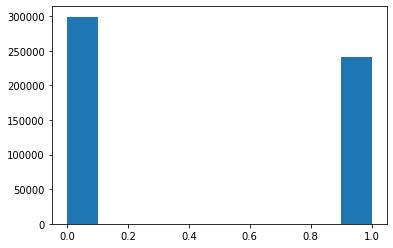

In [67]:
# Load in the data
airlines_df = pd.read_csv('Airlines.csv')

# Print summary of data
print(airlines_df.head())
print('\n')
print(airlines_df.describe())
print('\n')
print(airlines_df.info())
print('\n')
print(airlines_df.nunique())

plt.hist(airlines_df['Delay'])
plt.show()

## Step 3: Split the data into train and test sets

Now we will split our dataset into training and testing sets. The data from our training set will be used to build the model and the data from the test set will be used to validate the model.

We will also drop the Flight column (which shows which type of plane) and id column, as they may pollute our results (feature selection)

In [68]:
# Drop the features Flight and id
airlines_df = airlines_df.drop(["id","Flight"], axis=1)

airlines_df['DayOfWeek'] = airlines_df["DayOfWeek"].map({1:"Sun", 2:"Mon", 3:"Tues", 4:"Wed", 5:"Thurs", 6:"Fri", 7:"Sat"})

delays = airlines_df["Delay"].to_numpy()

features = airlines_df.drop(['Delay'], axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, delays, test_size=0.5, random_state=42, stratify=delays)

## Step 4: Preprocessing

There are a few data processing steps we need to execute before building our model:
1. Some columns are numeric (int64, float64) and some are non-numeric(object)
2. The numeric data has varying ranges.
3. It's not the case for this dataset, but if there were missing values, we'd have to come up with an interpolation strategy for the empty cells

In [69]:
# Convert the categorical features in the train and test sets independently
# this improves computation time. There are also some models that require strictly numeric format
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# we need to reindex the columns in case features appeared in the test set that were not in the train set
# set the fill value to 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

## Step 5: Building our ML Model

In [70]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(max_iter=1000)
# fit the model
logreg.fit(rescaled_X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 6: Model Accuracy

In [71]:
y_pred_train = logreg.predict(rescaled_X_train)
y_pred_test = logreg.predict(rescaled_X_test)

print("Accuracy of logistic regression classifier: ",accuracy_score(y_train, y_pred_train))

Accuracy of logistic regression classifier:  0.6468476886510859
